# Plots of oscilloscope records

In [3]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np


## Read waveforms from the file

XINC: 2e-08    YINC: 0.002    FRAMES: 508    TRIG: 0.00654    YORIGIN: -75.0
1 , 52 , 64 , 79352
2 , 52 , 124 , 111867
3 , 52 , 82 , 88416
4 , 51 , 107 , 101557
5 , 52 , 115 , 106285
6 , 53 , 100 , 98680
7 , 52 , 56 , 75329
8 , 52 , 87 , 91081
9 , 52 , 82 , 89289


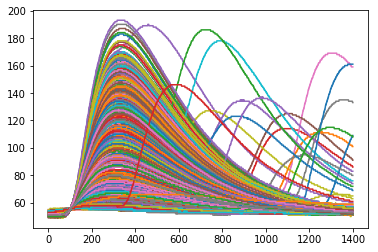

In [17]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np


with h5py.File('./data/data2.h5','r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC')), '   FRAMES:', np.array(hf.get('FRAMES')), '   TRIG:', np.array(hf.get('TRIG')), '   YORIGIN:', np.array(hf.get('YORIGIN'))
    frames = np.array(hf.get('FRAMES'))
    for n in range(1,frames+1):
        data = hf.get(str(n))
        np_data = np.array(data)
        plt.plot(np_data)
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(1400):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
        if n<10:
            print n,',', minimum,',', maximum,',', suma

## Parse all data files in current directory
Read in all the data files in current directory and process them into a histogram.

./data/data11.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data10.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data14.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data15.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data18.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data4.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data6.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data8.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 0
./data/data16.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data20.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data5.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data19.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data21.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data22.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data17.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data2.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 508
./data/data1.h5 XINC: 2e-08    YINC: 0.002    FRAMES: 0
./data/

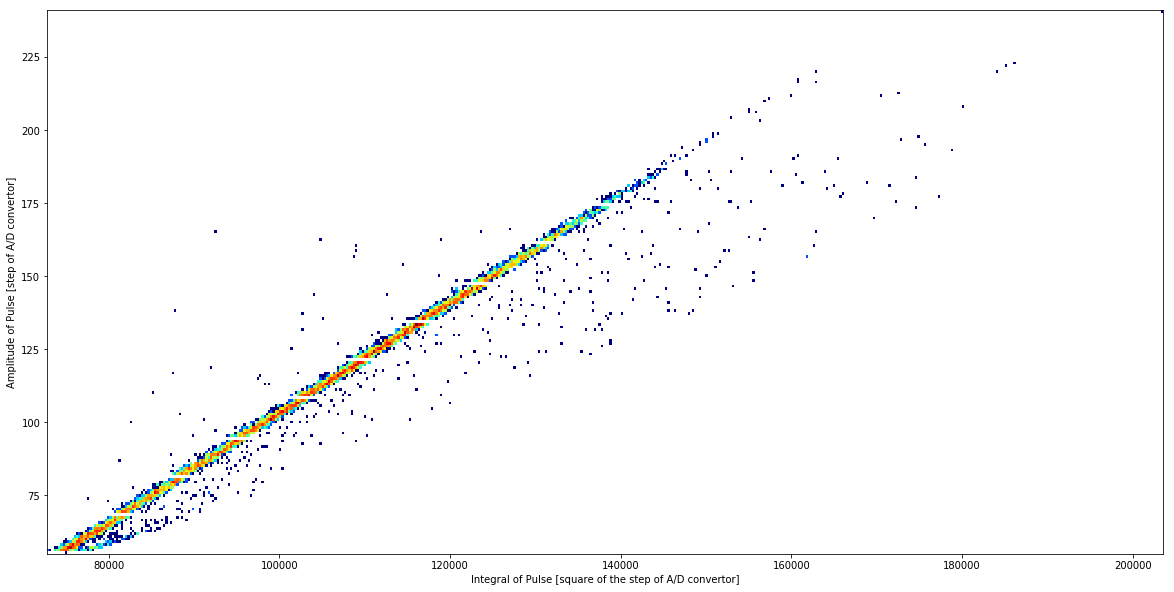

In [22]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, '   YINC:', yinc, '   FRAMES:', frames
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            np_data = np.array(data)
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(figsize=(20,10))

ble = plt.hist2d(y, x, bins=(500,200), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D convertor]')
plt.ylabel('Amplitude of Pulse [step of A/D convertor]')
#cb = plt.colorbar()
#cb.set_label('Count')

# Simply replot the current x, y in a nicer way

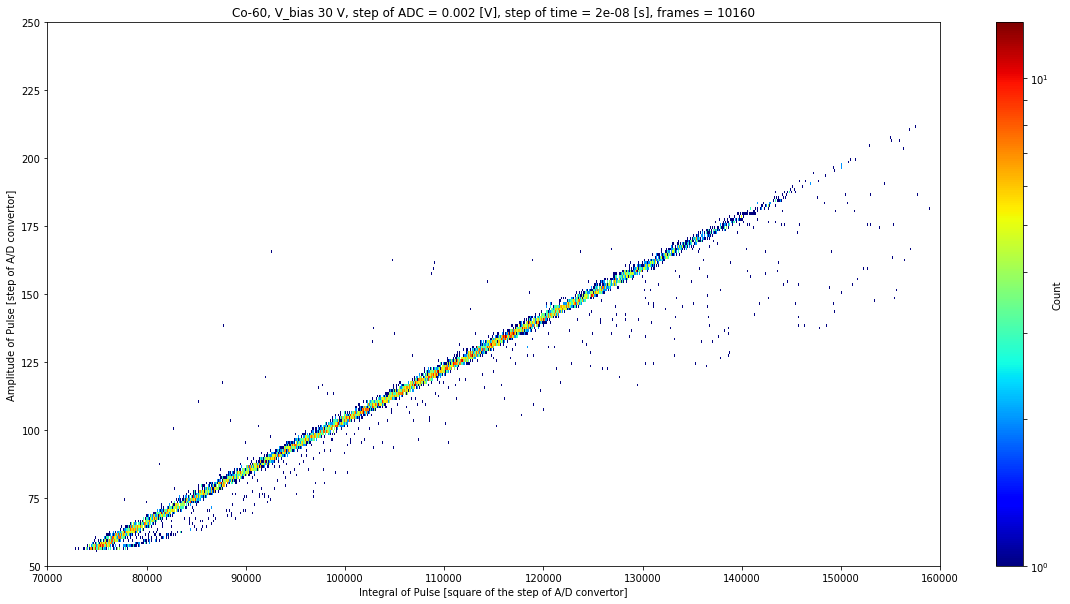

In [23]:
plt.figure(figsize=(20,10))

ble = plt.hist2d(y, x, bins=(1000,250-50),range=np.array([(70000,160000),(50,250)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(100,30),range=np.array([(70000, 80000),(50,80)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D convertor]')
plt.ylabel('Amplitude of Pulse [step of A/D convertor]')
plt.title('Co-60, V_bias 30 V, step of ADC = ' + str(yinc) + ' [V], step of time = ' + str(xinc) + ' [s], frames = '+ str(all_frames))
cb = plt.colorbar()
cb.set_label('Count')